In [35]:
import json
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
beautified = json.load(open("../Data/bostonResultsAll/EverythingUnlockedBoston.json",'rb'))

In [3]:
len(beautified.keys())

127

In [12]:
def shannonEntropy(vals):
    return -np.sum([pA*np.log(pA) for pA in vals])

In [5]:
beautified[beautified.keys()[1]]['']

{u'Top5Keys': [[u'513d6781fdc9f035870040bf',
   u'513d6b7cfdc9f03587004d23',
   u'513d67d2fdc9f0358700418b',
   u'513d6c9dfdc9f03587004ff1',
   u'513d68ccfdc9f035870044d7']],
 u'Top5Locs': {u'513d6781fdc9f035870040bf': {u'lat': 42.306672,
   u'long': -71.12599699999998},
  u'513d67d2fdc9f0358700418b': {u'lat': 42.313072,
   u'long': -71.09282400000002},
  u'513d68ccfdc9f035870044d7': {u'lat': 42.311218,
   u'long': -71.12872400000003},
  u'513d6b7cfdc9f03587004d23': {u'lat': 42.410808, u'long': -71.137429},
  u'513d6c9dfdc9f03587004ff1': {u'lat': 42.338113,
   u'long': -71.13611999999999}},
 u'Top5Paths': [[u'/work/sagarj/Work/BellLabs/streetview/PPImages/513d6781fdc9f035870040bf.jpg',
   u'/work/sagarj/Work/BellLabs/streetview/PPImages/513d6b7cfdc9f03587004d23.jpg',
   u'/work/sagarj/Work/BellLabs/streetview/PPImages/513d67d2fdc9f0358700418b.jpg',
   u'/work/sagarj/Work/BellLabs/streetview/PPImages/513d6c9dfdc9f03587004ff1.jpg',
   u'/work/sagarj/Work/BellLabs/streetview/PPImages/513d

In [6]:
bostonScores = json.load(open("bostonScores.json",'rb'))

In [54]:
bostonScores[bostonScores.keys()[1]]

{u'GreenCover': 2,
 u'Openness': 4,
 u'TnomyScores': {u'Architectural': 5,
  u'Landmark': 0,
  u'Natural': 0,
  u'Walkable': 0},
 u'Top5PlaceLabels': [u'/m/motel',
  u'/r/residential_neighborhood',
  u'/p/parking_lot',
  u'/d/driveway',
  u'/h/highway'],
 'VisualComplexity': 2,
 u'segnet': {u'Building': 0.05115740740740741,
  u'Fence': 0.010445601851851852,
  u'Pavement': 0.024189814814814813,
  u'Pedestrian': 0.0011458333333333333,
  u'Pole': 0.0047395833333333335,
  u'Road': 0.3553761574074074,
  u'Road Marking': 0.00013310185185185186,
  u'Sign Symbol': 0.001574074074074074,
  u'Sky': 0.3464988425925926,
  u'Tree': 0.18856481481481482,
  u'Vehicle': 0.01617476851851852}}

In [55]:
pavementValues = []

for k in bostonScores:
    if 'Pavement' in bostonScores[k]['segnet']:
        pavementValues.append(bostonScores[k]['segnet']['Pavement'])
    


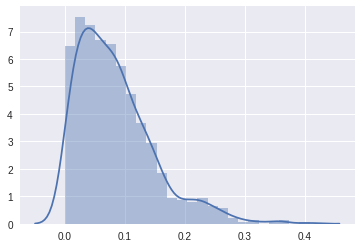

In [56]:
sns.distplot(pavementValues)

In [63]:
for k in bostonScores:
    pavWalk = 0
    if 'Pavement' in bostonScores[k]['segnet']:
        segnetPavement = bostonScores[k]['segnet']['Pavement']
        if segnetPavement <= 0.03:
            pavWalk = 1
        elif segnetPavement > 0.03 and segnetPavement <= 0.06:
            pavWalk = 2
        elif segnetPavement > 0.06 and segnetPavement <= 0.09:
            pavWalk = 3
        elif segnetPavement > 0.09 and segnetPavement <= 0.12:
            pavWalk = 4
        elif segnetPavement > 0.12:
            pavWalk = 5
    walkbaleScore = max(bostonScores[k]['TnomyScores']['Walkable'],pavWalk)
    bostonScores[k]['TnomyScores']['Walkable'] = walkbaleScore

In [64]:
entropyList = []

In [65]:
for k in bostonScores:
    segnetVals = bostonScores[k]['segnet'].values()
    entropy = shannonEntropy(segnetVals)
    entropyList.append(entropy)
    score = 0
    if entropy <= 1.25:
        score = 1
    elif entropy > 1.25 and entropy <= 1.5:
        score = 2
    elif entropy > 1.5 and entropy <= 1.65:
        score = 3
    elif entropy > 1.65 and entropy <= 1.80:
        score = 4
    elif entropy > 1.80:
        score = 5
#     print score
    bostonScores[k]['VisualComplexity'] = score

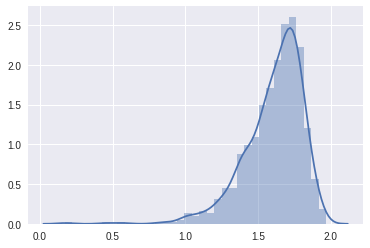

In [66]:
sns.distplot(entropyList)

In [67]:
bostonScores.keys()[10]

u'513d676efdc9f03587004089'

In [68]:
bostonScores[bostonScores.keys()[10]]

{u'GreenCover': 3,
 u'Openness': 2,
 u'TnomyScores': {u'Architectural': 4,
  u'Landmark': 0,
  u'Natural': 0,
  u'Walkable': 5},
 u'Top5PlaceLabels': [u'/r/residential_neighborhood',
  u'/a/alley',
  u'/a/apartment_building/outdoor',
  u'/d/driveway',
  u'/o/office_building'],
 'VisualComplexity': 5,
 u'segnet': {u'Bike': 6.944444444444444e-05,
  u'Building': 0.19435763888888888,
  u'Fence': 0.027349537037037037,
  u'Pavement': 0.17430555555555555,
  u'Pedestrian': 0.0039178240740740744,
  u'Pole': 0.020133101851851853,
  u'Road': 0.10952546296296296,
  u'Road Marking': 0.0008333333333333334,
  u'Sign Symbol': 0.002662037037037037,
  u'Sky': 0.18150462962962963,
  u'Tree': 0.23583333333333334,
  u'Vehicle': 0.04950810185185185}}

In [69]:
bostonImages = json.load(open("bostonImages.json",'rb'))

In [70]:
bostonImages[bostonImages.keys()[1]]

{u'lat': 42.298339,
 u'long': -71.10185100000002,
 u'rating': 27.808550020933033,
 u'variance': 27.808550020933033}

In [71]:
len(bostonImages.keys())

1316

In [72]:
finalDict = {}

In [73]:
for k in bostonImages:
    finalDict[k] = dict()
    finalDict[k]['location'] = dict()
    finalDict[k]['location']['lat'] = bostonImages[k]['lat']
    finalDict[k]['location']['long'] = bostonImages[k]['long']
    finalDict[k]['trueSkill'] = bostonImages[k]['rating']
#     finalDict[k]['trueSkillVar'] = bostonImages[k]['variance']
    finalDict[k]['metrics'] = dict()
    if k in bostonScores:
        finalDict[k]['metrics'] = bostonScores[k]
    finalDict[k]['beautified'] = dict()
    if k in beautified:
        finalDict[k]['beautified']['flag'] = True
        finalDict[k]['beautified']['XformedKeys'] = beautified[k]['Top5Keys']
    else:
        finalDict[k]['beautified']['flag'] = False
        finalDict[k]['beautified']['XformedKeys'] = []

In [77]:
finalDict[finalDict.keys()[15]]

{'beautified': {'XformedKeys': [], 'flag': False},
 'location': {'lat': 42.403638, 'long': -71.046266},
 'metrics': {u'GreenCover': 2,
  u'Openness': 3,
  u'TnomyScores': {u'Architectural': 3,
   u'Landmark': 0,
   u'Natural': 0,
   u'Walkable': 2},
  u'Top5PlaceLabels': [u'/r/residential_neighborhood',
   u'/a/apartment_building/outdoor',
   u'/a/alley',
   u'/c/crosswalk',
   u'/p/parking_lot'],
  'VisualComplexity': 4,
  u'segnet': {u'Bike': 0.0015567129629629629,
   u'Building': 0.16808449074074075,
   u'Fence': 0.008900462962962962,
   u'Pavement': 0.03125,
   u'Pedestrian': 0.0011111111111111111,
   u'Pole': 0.006487268518518519,
   u'Road': 0.24349537037037036,
   u'Road Marking': 0.005572916666666667,
   u'Sign Symbol': 0.0016782407407407408,
   u'Sky': 0.24335069444444443,
   u'Tree': 0.1887962962962963,
   u'Vehicle': 0.09971643518518518}},
 'trueSkill': 21.546167887657763}

In [47]:
len(finalDict.keys())

1316

In [78]:
# json.dump(finalDict,open("BostonCollatedV4.json",'wb'))